## Import Dependencies

In [1]:
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib.gridspec import GridSpec
from imblearn.over_sampling import ADASYN
import joblib

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Lung Cancer Survey Dataset

In [6]:
cancer = pd.read_csv("lung_cancer_survey.csv")
cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Understanding the Dataset

In [7]:
cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
cancer.duplicated().sum()

33

In [9]:
cancer = cancer.drop_duplicates()

In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [11]:
cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Dataset Preprocessing

In [12]:
le=preprocessing.LabelEncoder()
cancer['GENDER']=le.fit_transform(cancer['GENDER'])
cancer['LUNG_CANCER']=le.fit_transform(cancer['LUNG_CANCER'])
cancer['SMOKING']=le.fit_transform(cancer['SMOKING'])
cancer['YELLOW_FINGERS']=le.fit_transform(cancer['YELLOW_FINGERS'])
cancer['ANXIETY']=le.fit_transform(cancer['ANXIETY'])
cancer['PEER_PRESSURE']=le.fit_transform(cancer['PEER_PRESSURE'])
cancer['CHRONIC DISEASE']=le.fit_transform(cancer['CHRONIC DISEASE'])
cancer['FATIGUE ']=le.fit_transform(cancer['FATIGUE '])
cancer['ALLERGY ']=le.fit_transform(cancer['ALLERGY '])
cancer['WHEEZING']=le.fit_transform(cancer['WHEEZING'])
cancer['ALCOHOL CONSUMING']=le.fit_transform(cancer['ALCOHOL CONSUMING'])
cancer['COUGHING']=le.fit_transform(cancer['COUGHING'])
cancer['SHORTNESS OF BREATH']=le.fit_transform(cancer['SHORTNESS OF BREATH'])
cancer['SWALLOWING DIFFICULTY']=le.fit_transform(cancer['SWALLOWING DIFFICULTY'])
cancer['CHEST PAIN']=le.fit_transform(cancer['CHEST PAIN'])
cancer['LUNG_CANCER']=le.fit_transform(cancer['LUNG_CANCER'])

In [13]:
cancer.sum()

GENDER                     142
AGE                      17363
SMOKING                    150
YELLOW_FINGERS             159
ANXIETY                    137
PEER_PRESSURE              140
CHRONIC DISEASE            144
FATIGUE                    183
ALLERGY                    151
WHEEZING                   151
ALCOHOL CONSUMING          152
COUGHING                   159
SHORTNESS OF BREATH        174
SWALLOWING DIFFICULTY      129
CHEST PAIN                 154
LUNG_CANCER                238
dtype: int64

In [14]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


## Data Visualization

In [15]:
def plot(col, cancer=cancer):
    return cancer.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(
        kind='bar', figsize=(8,5))

<Axes: xlabel='CHEST PAIN'>

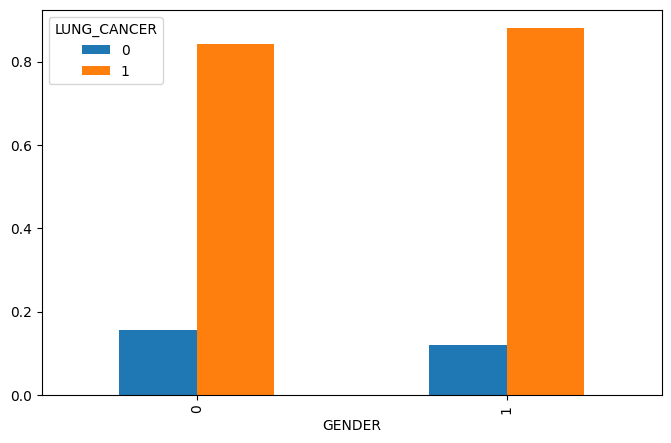

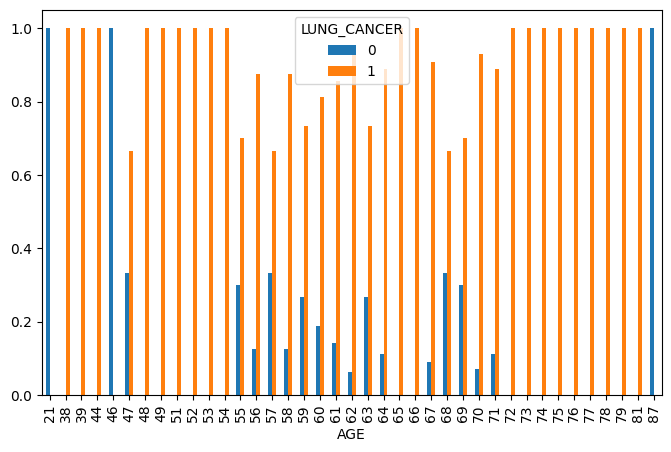

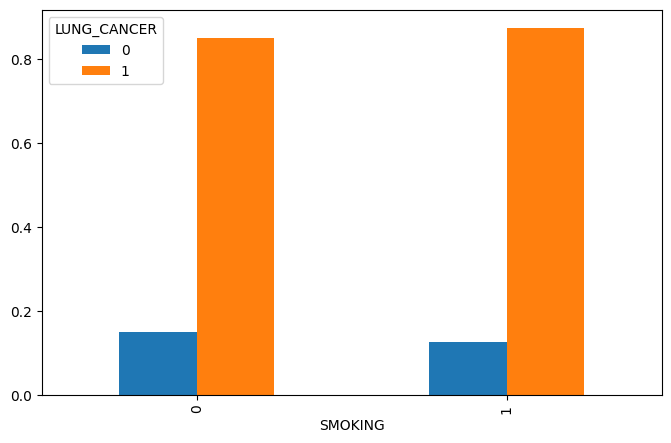

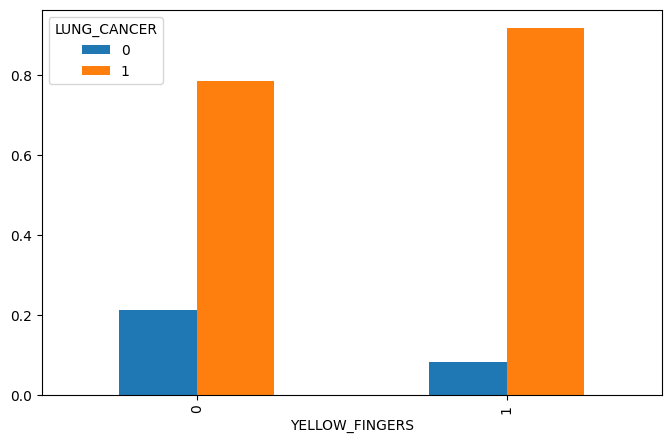

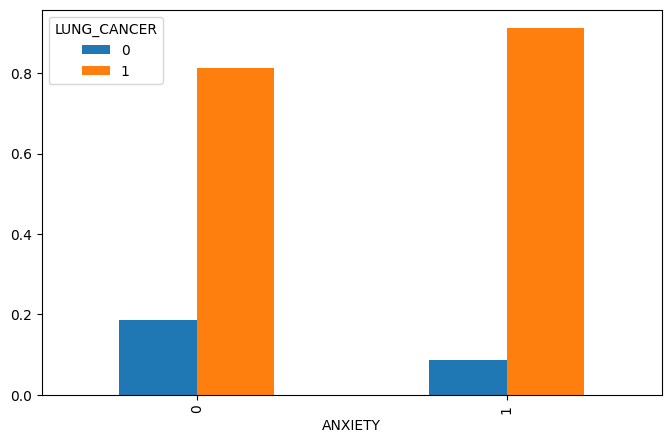

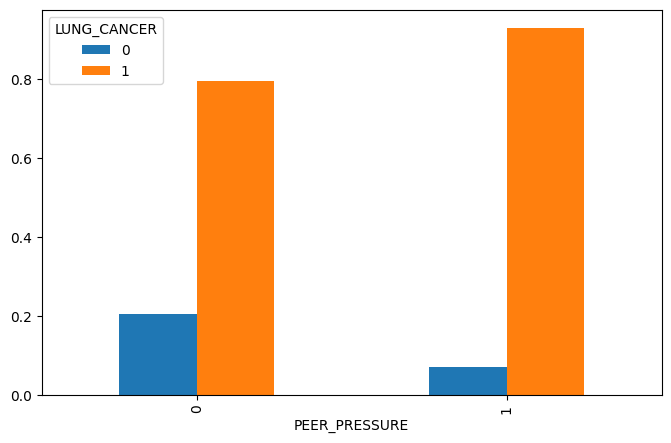

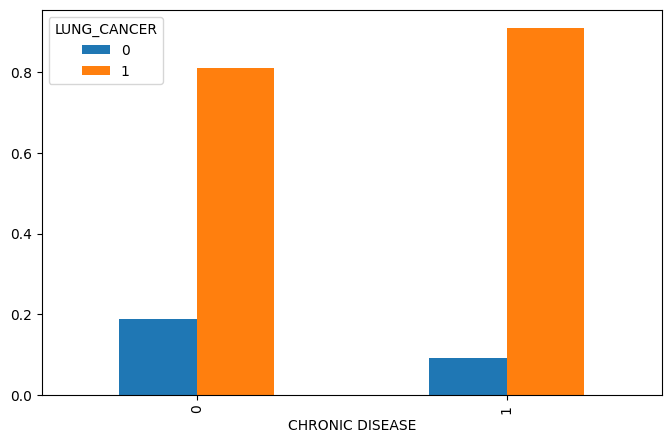

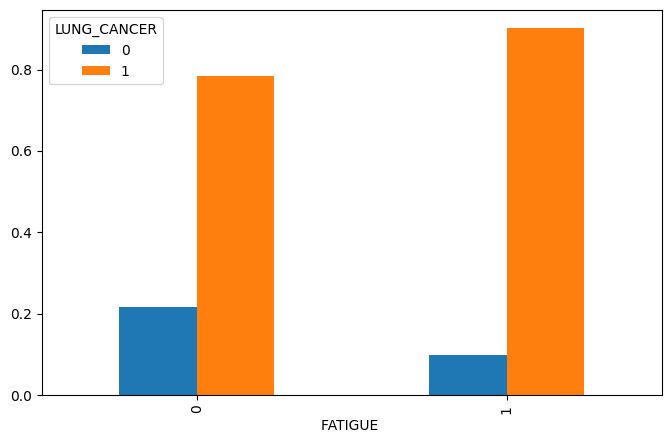

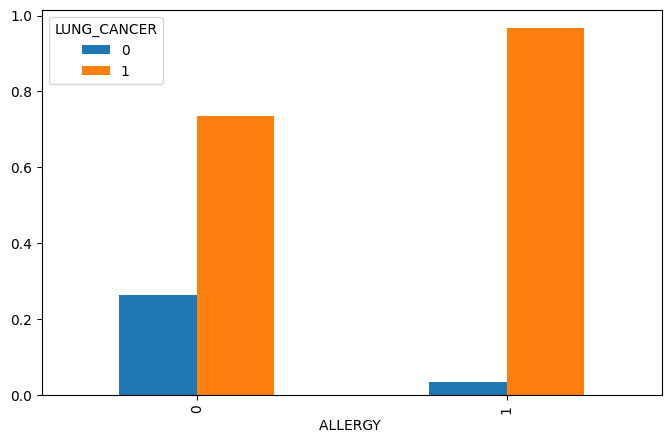

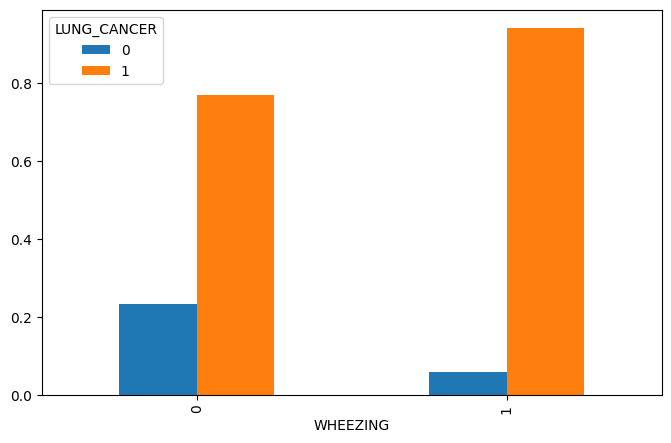

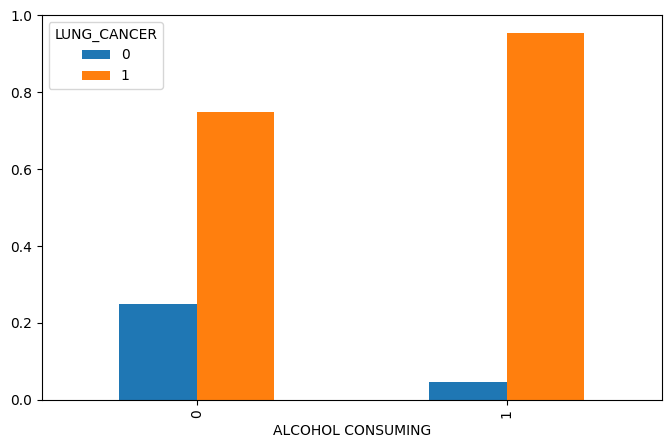

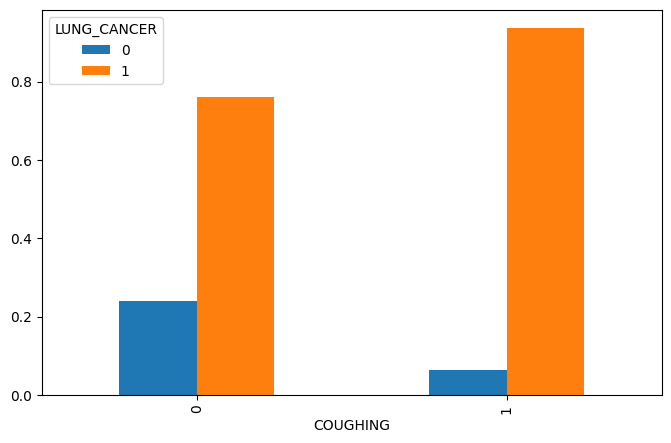

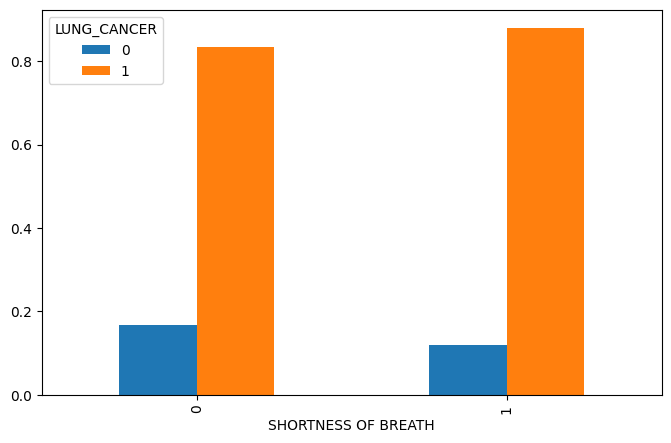

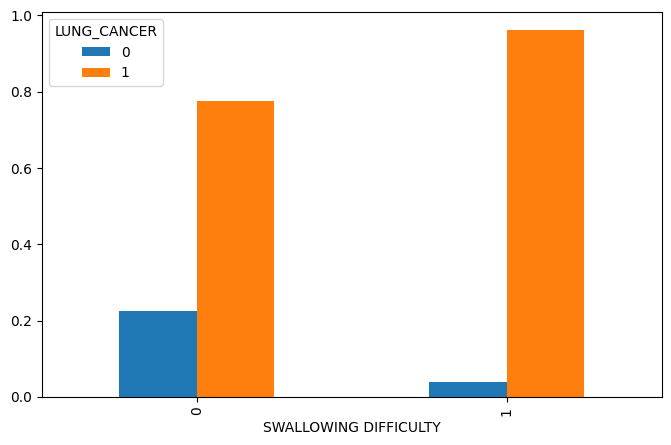

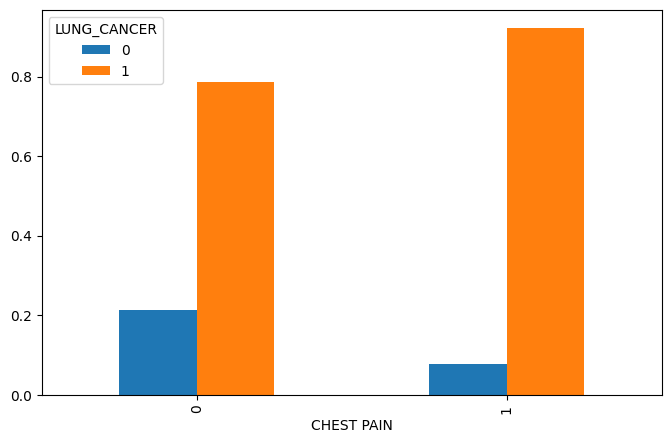

In [16]:
plot("GENDER")
plot("AGE")
plot("SMOKING")
plot("YELLOW_FINGERS")
plot("ANXIETY")
plot("PEER_PRESSURE")
plot("CHRONIC DISEASE")
plot("FATIGUE ")
plot("ALLERGY ")
plot("WHEEZING")
plot("ALCOHOL CONSUMING")
plot("COUGHING")
plot("SHORTNESS OF BREATH")
plot("SWALLOWING DIFFICULTY")
plot("CHEST PAIN")

### Dropping Columns that do not Contribute much to the Predictions

In [17]:
cancer_upd = cancer.drop(columns = ['GENDER','AGE','SMOKING','SHORTNESS OF BREATH'])
cancer_upd

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [18]:
cancer_upd[cancer_upd.sum(axis=1) == 13]

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER


### Correlation between Columns

In [19]:
corr = cancer_upd.corr()
corr

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


#### Visualizing the Correlation

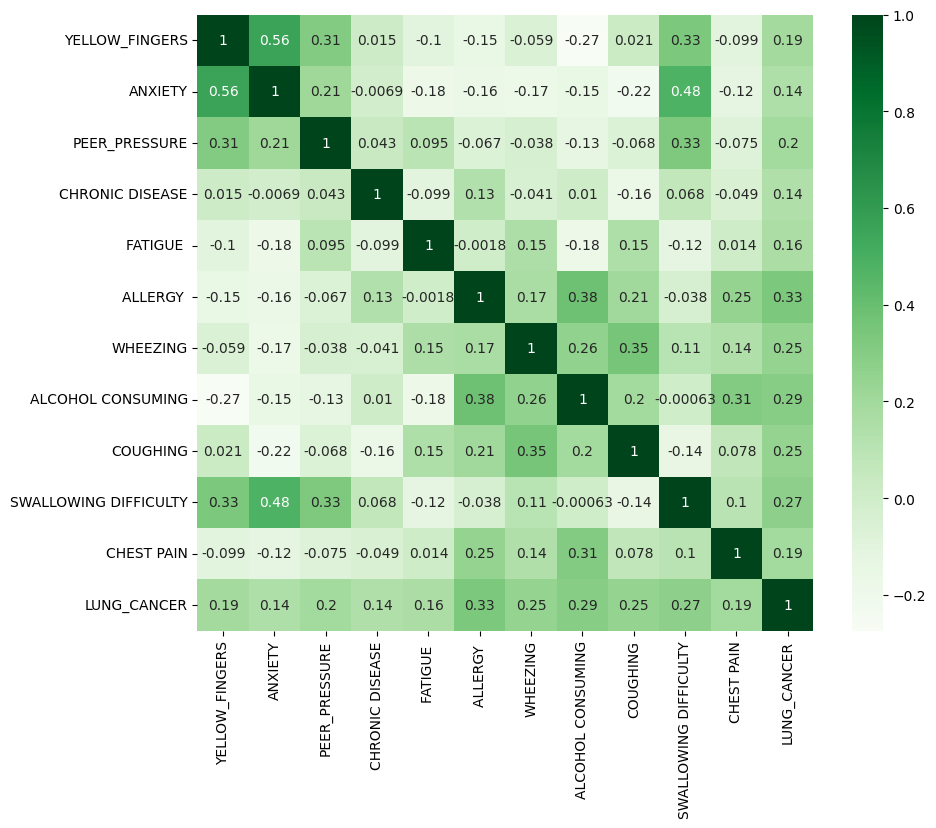

In [20]:
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap="Greens",annot=True, square=True)
plt.show()

<Axes: >

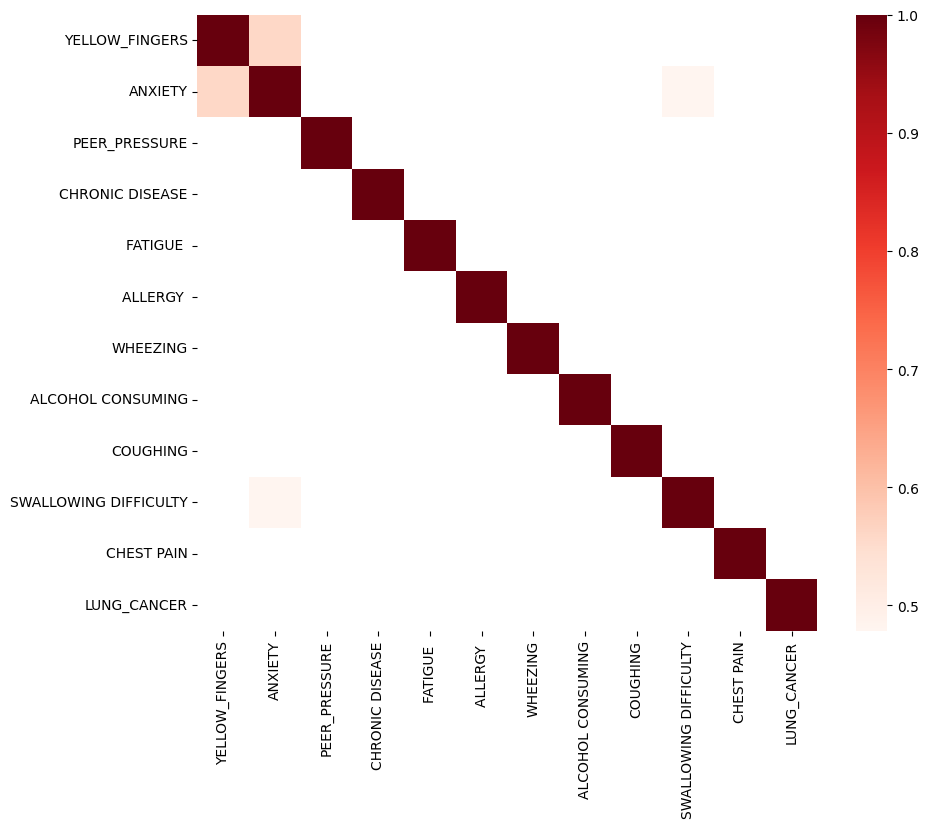

In [21]:
kot = corr[corr>=.40]
plt.figure(figsize=(10,8))
sns.heatmap(kot, cmap="Reds")

#### Combine the ANXIETY & YELLOW_FINGERS Columns as they are more Correlated

In [22]:
cancer_upd['ANXYELFIN']=cancer_upd['ANXIETY']*cancer_upd['YELLOW_FINGERS']
cancer_upd

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


## Features & Labels Extraction

In [23]:
X = cancer_upd.drop('LUNG_CANCER', axis = 1)
Y = cancer_upd['LUNG_CANCER']

### ADASYN to Generate Synthetic Data to Fill the Minority Sample

In [24]:
adasyn = ADASYN(random_state=42)
X, Y = adasyn.fit_resample(X, Y)
print(len(X),len(Y))

471 471


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [26]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)

In [27]:
LogReg=LogisticRegression(random_state=0)
LogReg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [31]:
X_test

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,ANXYELFIN
102,1,1,1,0,1,0,0,0,1,1,1,1
76,1,1,1,1,1,1,1,0,1,1,1,1
21,1,1,1,0,0,1,1,0,1,1,0,1
132,0,1,0,0,1,0,1,1,1,1,0,0
362,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
278,0,0,1,0,0,0,0,0,1,0,0,0
171,1,0,1,0,1,1,1,1,1,0,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
383,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
Y_test

102    1
76     1
21     1
132    1
362    0
      ..
278    0
171    1
4      0
383    0
308    0
Name: LUNG_CANCER, Length: 118, dtype: int64

In [28]:
Y_pred= LogReg.predict(X_test)

In [29]:
LogReg_Report=classification_report(Y_test, Y_pred)
print(LogReg_Report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        56

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [33]:
joblib.dump(LogReg, 'LCD_LogReg.pkl')

['LCD_LogReg.pkl']